# Read Data

In [1]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')
# Only select two values in the dependent variable to make it binary classification problem
# Only pick 2 feature in order to make easier for modelling and visulisation
df=df[df['variety'].isin(['Setosa', 'Versicolor'])]
df=df[['sepal.length','petal.length', 'variety']]
df.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


# Data Processing

In [2]:
# encode data
from sklearn.preprocessing import LabelEncoder

X = df[['sepal.length','petal.length']].values
y = df['variety'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor'}

In [4]:
# Let standardize the data
from sklearn import preprocessing
standard_scaler=preprocessing.StandardScaler()
scaled_X = standard_scaler.fit_transform(X)

In [5]:
#Let's split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, train_size=0.9)

# Fit LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis(solver='eigen', n_components=1)
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=1, solver='eigen')

In [57]:
clf.predict(x_test)

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 1])

In [58]:
y_test

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 1])

In [59]:
w=clf.coef_[0]
a=w[0]/w[1]
b=(clf.intercept_[0])/w[1]
w

array([-7.12321029, 46.27703824])

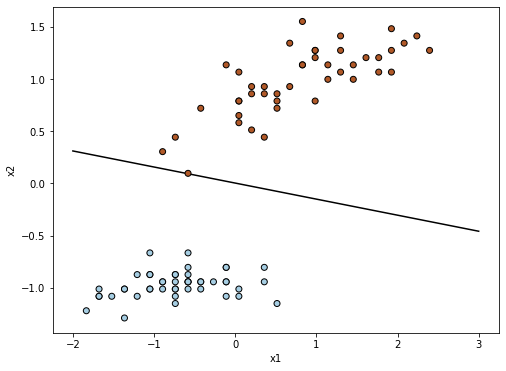

In [60]:
import matplotlib.pyplot as plt
import numpy as np
xx = np.linspace(-2, 3)
yy = a * xx-b

plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [61]:
# Probability of class1 VS class2
clf.predict_proba(x_test)

array([[0.00000000e+00, 1.00000000e+00],
       [1.62092562e-14, 1.00000000e+00],
       [5.66213743e-14, 1.00000000e+00],
       [1.00000000e+00, 4.45215121e-16],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [4.59554461e-09, 9.99999995e-01],
       [1.00000000e+00, 1.56017451e-15],
       [1.00000000e+00, 2.21889939e-18],
       [1.00000000e+00, 2.38285679e-19]])

In [62]:
# The decision function is equal (up to a constant factor) to the log-posterior of the model, i.e. log p(y = k | x). 
# In a binary classification setting this instead corresponds to the difference log p(y = 1 | x) - log p(y = 0 | x)
# The first number is positive which mean p(class2)>p(class1), then predict as class2
print(clf.decision_function(x_test))

[ 49.8918081   31.75587296  30.50187759 -35.34797409  40.26601646
  51.00745625  19.19817856 -34.09397872 -40.64952037 -42.88081667]


In [63]:
# This is the within class scatter matrix (n_features, n_features), covariance matrix
# Covariance provides insight into how two variables are related to one another. 
# covariance_matrix[x1x1(variance of x1), x1x2(covariance of x1x2)
#                   x2x1(covariance of x2x1), x2x2(variance of x2)]
# This is a sum up of 2 groups' covariance matrix
clf.covariance_

array([[0.48092489, 0.1067405 ],
       [0.1067405 , 0.05876302]])

In [64]:
# d-dimentional mean vectors
clf.means_

array([[-0.71385373, -0.97077401],
       [ 0.80005129,  0.98826934]])

In [65]:
# explained_variance_ratio_ndarray of shape (n_components,) is the ratio of the variance explained after projection
clf.explained_variance_ratio_

array([1.])

In [42]:
clf_transform_result=clf.transform(x_train)

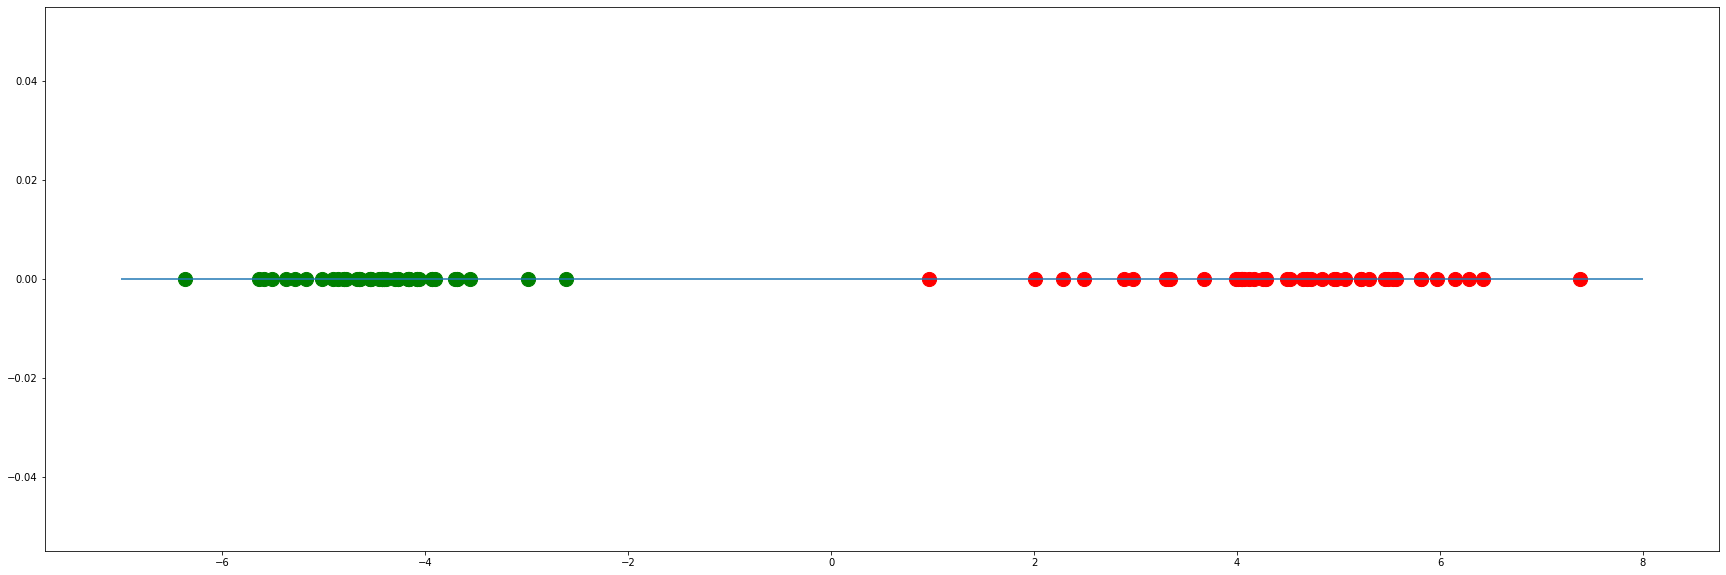

In [41]:
plt.figure(figsize=(30,10))
xmin = -7
xmax = 8
y_position = 0
height = 1
plt.hlines(y_position, xmin, xmax)
plt.scatter(clf.transform(x_train)[y_train==1],np.array(sum(y_train==1)*[0]), s=200, marker='o',color='green')
plt.scatter(clf.transform(x_train)[y_train==2],np.array(sum(y_train==2)*[0]), s=200, marker='o',color='red')
# plt.axis('off')
plt.show()

# Fit SVM

In [68]:
from sklearn import svm

# Create a svm Classifier. Let give it a big C to make it hard margin 
clf=svm.SVC(kernel='linear', C=100)

In [69]:
# Train the model using the training sets
clf.fit(x_train, y_train)

SVC(C=100, kernel='linear')

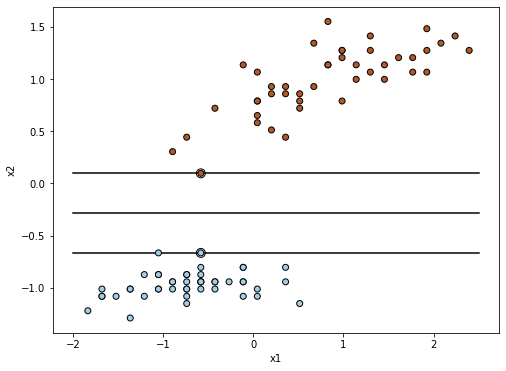

In [77]:
w=clf.coef_[0]
a=-w[0]/w[1]
b=(clf.intercept_[0])/w[1]
xx = np.linspace(-2, 2.5)
yy = a * xx-(clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Fit Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)

LogisticRegression(C=100)

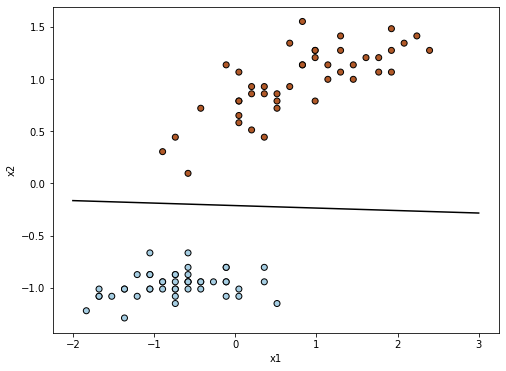

In [80]:
w=clf.coef_[0]
a=-w[0]/w[1]
b=(clf.intercept_[0])/w[1]
xx = np.linspace(-2, 3)
yy = a * xx-b

plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()